# 라이브러리 로드 및 데이터 불러오기

## 라이브러리 로드

In [1]:
import pandas as pd
import seaborn as sns;
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

## 데이터 불러오기

In [2]:
df = pd.read_csv("data/Data_preprocess_ver2.csv")
df.head()

,Unnamed: 0,Gender,Age,School,New Media Utlz,Media Utlz,Community Utlz,Privacy,Literacy
0,0,M,53,U,5.171429,4.808511,2.785714,4.375,2.864865
1,1,W,48,U,7.142857,4.255319,2.714286,4.000,3.324324
2,2,W,24,U,6.971429,4.638298,2.785714,4.250,3.270270
3,3,M,20,U,5.542857,4.212766,2.357143,4.250,3.189189
4,4,M,55,U,4.571429,4.808511,3.071429,4.375,2.864865


## 데이터 정보

In [3]:
media = df.iloc[:, 1:]    # 인덱스 col 제외한 나머지 데이터
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528 entries, 0 to 4527
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4528 non-null   object 
 1   Age             4528 non-null   int64  
 2   School          4528 non-null   object 
 3   New Media Utlz  4528 non-null   float64
 4   Media Utlz      4528 non-null   float64
 5   Community Utlz  4528 non-null   float64
 6   Privacy         4528 non-null   float64
 7   Literacy        4528 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 283.1+ KB


총 4528개의 데이터(rows), 8개의 열(columns) -> 1개의 종속변수, 7개의 설명변수

## 양적 변수의 기술통계량

In [4]:
media.describe()

,Age,New Media Utlz,Media Utlz,Community Utlz,Privacy,Literacy
count,4528.000000,4528.000000,4528.000000,4528.000000,4528.000000,4528.000000
mean,37.984099,4.921012,4.089754,1.450530,3.798973,3.120320
std,14.875218,1.732598,0.776125,0.814148,0.856788,0.500809
min,13.000000,1.428571,1.000000,1.000000,1.000000,1.000000
25%,24.000000,3.600000,3.680851,1.000000,3.250000,2.783784
50%,39.000000,4.885714,4.212766,1.000000,4.000000,3.135135
75%,50.000000,6.142857,4.723404,1.571429,4.500000,3.459459
max,90.000000,9.000000,5.000000,6.000000,5.000000,4.594595


## 질적 변수의 분포 확인

<AxesSubplot:xlabel='Gender', ylabel='count'>

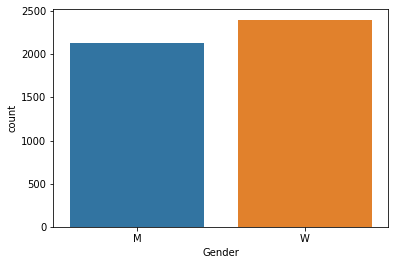

In [5]:
sns.countplot(data=media, x='Gender')

<AxesSubplot:xlabel='School', ylabel='count'>

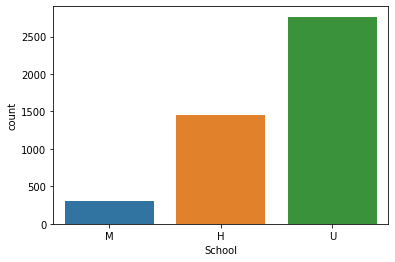

In [6]:
sns.countplot(data=media, x='School', order=['M', 'H', 'U'])

## 질적 변수에 대한 가변수 처리

In [7]:
media2 = pd.get_dummies(media, columns=['Gender', 'School'], drop_first=True).iloc[:, [6, 7, 8, 0, 1, 2, 3, 4, 5]]
media2.head()

,Gender_W,School_M,School_U,Age,New Media Utlz,Media Utlz,Community Utlz,Privacy,Literacy
0,0,0,1,53,5.171429,4.808511,2.785714,4.375,2.864865
1,1,0,1,48,7.142857,4.255319,2.714286,4.000,3.324324
2,1,0,1,24,6.971429,4.638298,2.785714,4.250,3.270270
3,0,0,1,20,5.542857,4.212766,2.357143,4.250,3.189189
4,0,0,1,55,4.571429,4.808511,3.071429,4.375,2.864865


Gender_W : 남자는 0, 여자는 1  
School_M = 1 -> 중졸  
School_U = 1 -> 대졸 이상   
School_U = 0 & School_U = 0 -> 고졸 (기본 범주)

# 데이터 시각화 및 탐색

## 히스토그램을 통한 반응변수 분포 확인

<AxesSubplot:xlabel='Literacy', ylabel='Count'>

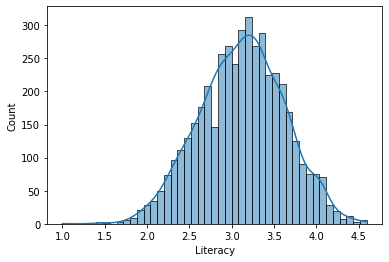

In [8]:
sns.histplot(media["Literacy"], kde=True)

## 히스토그램을 통한 설명변수(양적 변수) 분포 확인

C:\Users\KimYoungHo\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


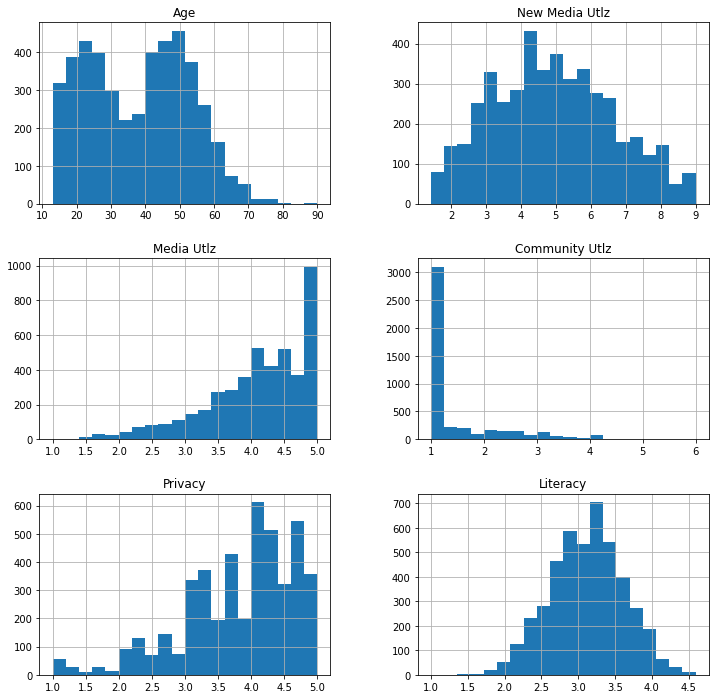

In [9]:
h = media.hist(figsize=(12, 12), bins=20)

## 산점도 행렬을 통한 변수 간 주변관계 확인

### 모든 변수를 이용한 산점도 행렬

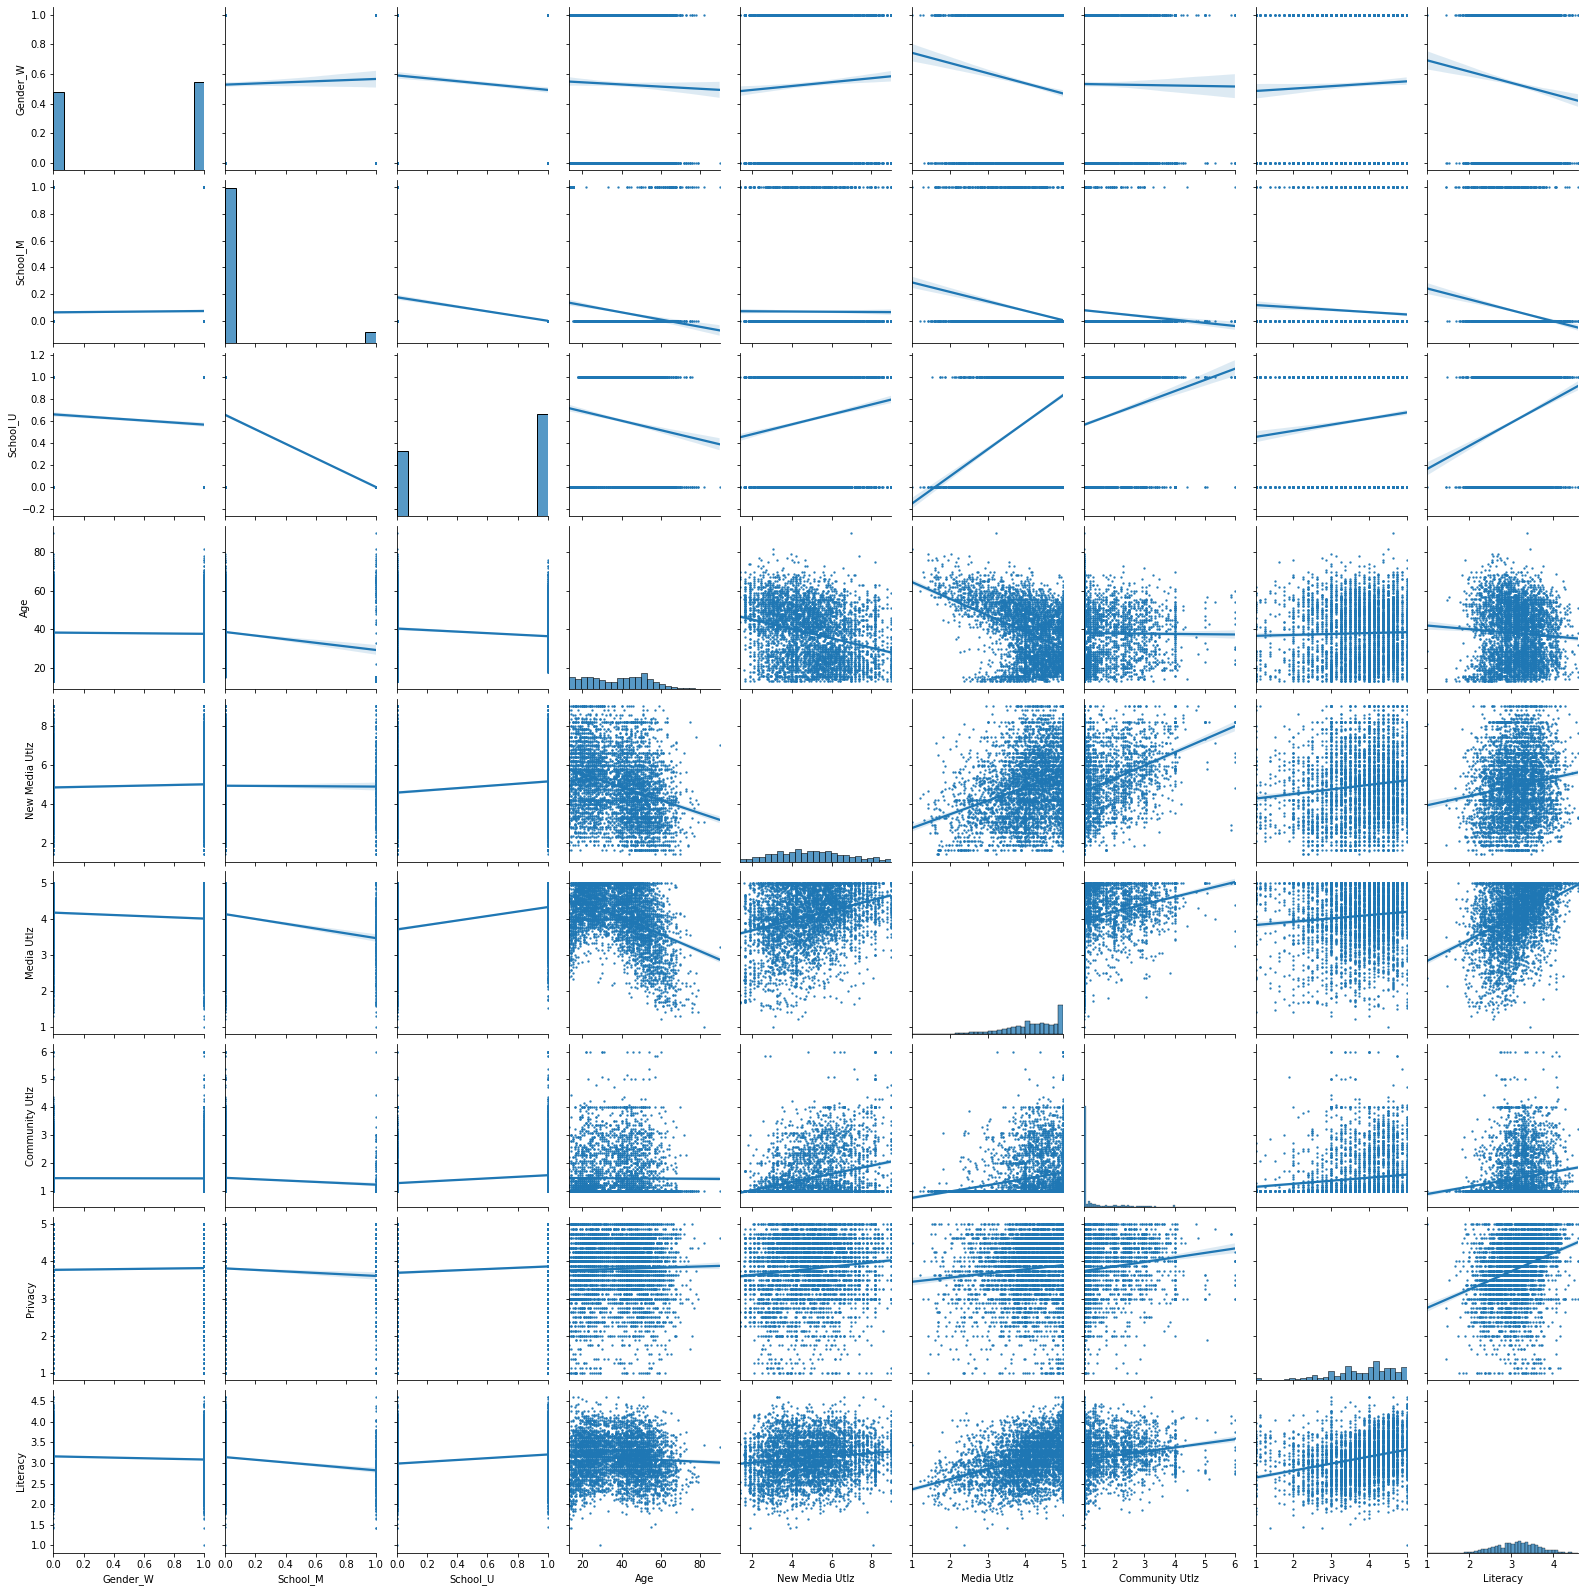

In [10]:
sns.pairplot(media2, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=2)))
plt.show()

성별/나이/학력은 범주형 변수로써, scatter plot으로 관계를 파악하기에는 어려움이 있다.  
따라서 나머지 변수들로만 다시 그래프를 그린다

### 양적 변수만을 사용한 산점도 행렬

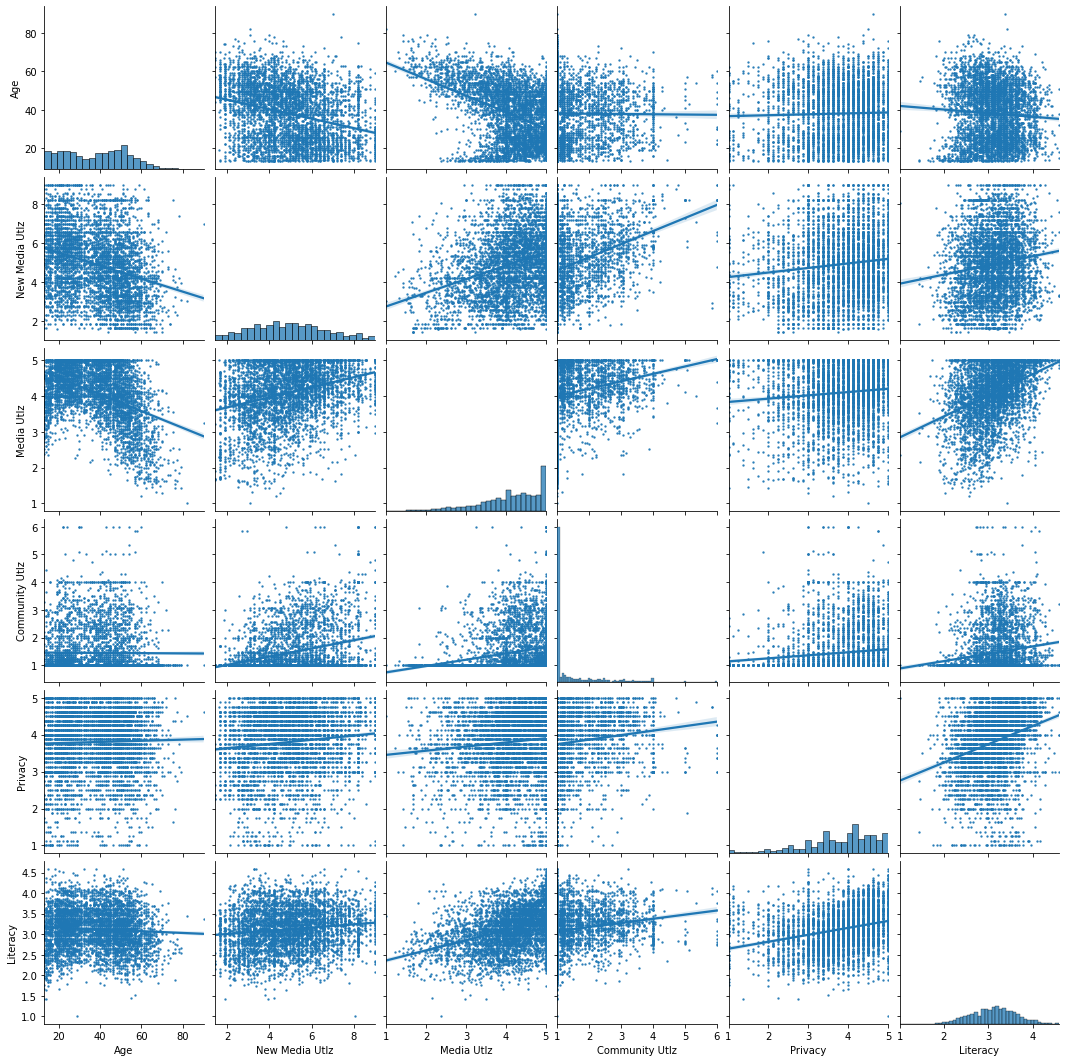

In [11]:
sns.pairplot(media2.iloc[:, 3:], aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=2)))
plt.show()

: 각 변수간 주변관계를 확인 가능  
  하지만, 관측치가 매우 많기 때문에 산점도만으로는 데이터의 분포를 확인하는데 어려움이 있다

### 데이터를 이용한 kde(kernal density estimation) 그래프 그리기

참고 : https://en.wikipedia.org/wiki/Kernel_density_estimation

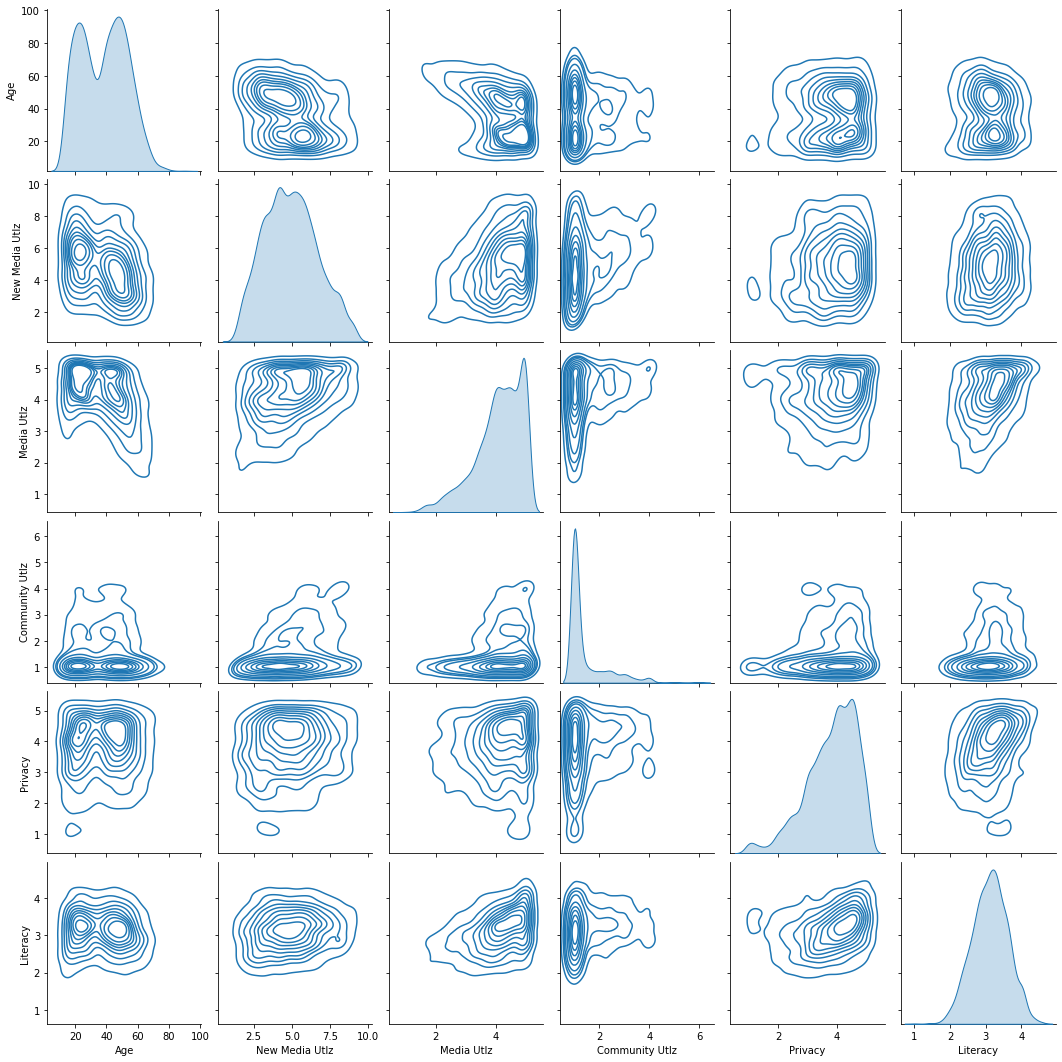

In [12]:
sns.pairplot(media2.iloc[:, 3:], aspect=1, kind="kde")
plt.show()

: 추정된 2차원 확률밀도함수로 데이터의 분포를 확인할 수 있다

## 변수간 상관계수 확인

<AxesSubplot:>

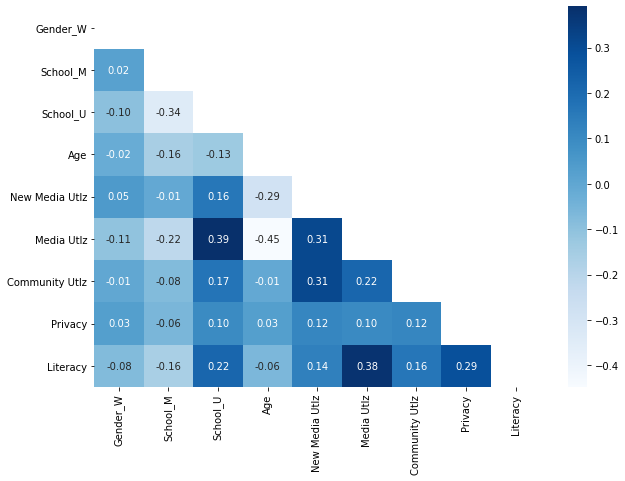

In [13]:
mask = np.triu(np.ones_like(media2.corr(), dtype=bool))
plt.figure(figsize=(10, 7))
sns.heatmap(media2.corr(), mask=mask, annot=True, fmt=".2f", cmap="Blues")

# 모델 적합 및 가설 검정

## 전체 설명변수 적합 
Y = B0 + aG + d1S1 + d2S2 + B1X1 + B2X2 + B3X3 + B4X4 + B5X5  (a : alpha, d : delta)  
H0 : a = d1 = d2 = B1 = B2 = B3 = B4 = B5 = 0 에 대한 검증

In [14]:
target = media2[['Literacy']]
target.head()   # 반응변수 데이터

,Literacy
0,2.864865
1,3.324324
2,3.270270
3,3.189189
4,2.864865


In [15]:
x_data1 = media2.iloc[:, :8]
x_data1.head()   # 설명변수 데이터

,Gender_W,School_M,School_U,Age,New Media Utlz,Media Utlz,Community Utlz,Privacy
0,0,0,1,53,5.171429,4.808511,2.785714,4.375
1,1,0,1,48,7.142857,4.255319,2.714286,4.000
2,1,0,1,24,6.971429,4.638298,2.785714,4.250
3,0,0,1,20,5.542857,4.212766,2.357143,4.250
4,0,0,1,55,4.571429,4.808511,3.071429,4.375


In [16]:
x_data1_1 = sm.add_constant(x_data1, has_constant="add")
model1 = sm.OLS(target, x_data1_1)
fitted_model1 = model1.fit()
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     163.9
Date:                Thu, 20 May 2021   Prob (F-statistic):          2.58e-243
Time:                        18:58:52   Log-Likelihood:                -2716.6
No. Observations:                4528   AIC:                             5451.
Df Residuals:                    4519   BIC:                             5509.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4870      0.062     23.986      0.000       1.365       1.609
Gender_W          -0.0382      0.013     -2.865      0.004      -0.064      -0.012
School_M          -0.0751      0.029     -2.590      0.010      -0.132      -0.018
School_U           0.0398      0.015      2.584      0.010       0.010       0.070
Age                0.0030      0.001      5.652      0.000       0.002       0.004
New Media Utlz     0.0005      0.004      0.112      0.910      -0.008       0.009
Media Utlz         0.2307      0.011     21.265      0.000       0.209       0.252
Community Utlz     0.0301      0.009      3.451      0.001       0.013       0.047
Privacy            0.1398      0.008     17.931      0.000       0.124       0.155
==============================================================================
Omnibus:                        4.917   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.920
Skew:                          -0.081   Prob(JB):                       0.0854
Kurtosis:                       2.996   Cond. No.                         401.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0 : B1 = B2 = ... = Bp에 대한 F 통계량 : 163.9, p-vale : 0.000 -> H0 기각

## RM1 : 뉴미디어 활용 수준 제거(H0 : B5 = 0에 대한 가설검정)

### 모델 적합

In [17]:
x_data2 = x_data1[['Gender_W', 'School_M', 'School_U', 'Age', 'Media Utlz', 'Community Utlz', 'Privacy']]
x_data2_1 = sm.add_constant(x_data2, has_constant="add")
model2 = sm.OLS(target, x_data2_1)
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     187.3
Date:                Thu, 20 May 2021   Prob (F-statistic):          1.83e-244
Time:                        18:58:52   Log-Likelihood:                -2716.6
No. Observations:                4528   AIC:                             5449.
Df Residuals:                    4520   BIC:                             5501.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4883      0.061     24.488      0.000       1.369       1.607
Gender_W          -0.0381      0.013     -2.864      0.004      -0.064      -0.012
School_M          -0.0750      0.029     -2.589      0.010      -0.132      -0.018
School_U           0.0398      0.015      2.591      0.010       0.010       0.070
Age                0.0030      0.001      5.739      0.000       0.002       0.004
Media Utlz         0.2308      0.011     21.476      0.000       0.210       0.252
Community Utlz     0.0303      0.008      3.626      0.000       0.014       0.047
Privacy            0.1398      0.008     17.997      0.000       0.125       0.155
==============================================================================
Omnibus:                        4.954   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.956
Skew:                          -0.081   Prob(JB):                       0.0839
Kurtosis:                       2.996   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SSE(FM) 계산

In [18]:
fitted1 = fitted_model1.predict(x_data1_1)
fm_sse = 0
target_val = media['Literacy']
for i in range(target_val.shape[0]):
    fm_sse += (fitted1[i] - target_val[i])**2
fm_sse

880.1195503609765

### SSE(RM1) 계산

In [19]:
fitted2 = fitted_model2.predict(x_data2_1)
rm_sse1 = 0
target_val = media['Literacy']
for i in range(target_val.shape[0]):
    rm_sse1 += (fitted2[i] - target_val[i])**2
rm_sse1

880.1220120000925

### F값 계산

In [20]:
from scipy.stats import f
F_stats = ((rm_sse1-fm_sse)/1)/(fm_sse/(media.shape[0]-9))   # media.shape[0] : 데이터의 row 개수
F_stats

0.0126393592329752

### P-value(F값) 계산

In [21]:
f_dist = f(1, media.shape[0]-9)
1-f_dist.cdf(F_stats)

0.9104915027032716

p-value = 0.910 > 0.05 -> H0 채택, 뉴미디어 활용수준을 제거해도 설명력에 유의미한 감소 존재하지 않음

## RM2 : 10xB2(Age) = B6(Community Utlz)  
H0 : 10 x B2 = B6 | (B5 = 0) vs H1 : 10 x B2 ≠ B6 | (B5 = 0)에 대한 가설검정  
(기존 적합값 B2 = 0.0030, B6 = 0.0303)

### 모델 적합

In [22]:
x_data3 = x_data1[['Gender_W', 'School_M', 'School_U', 'Media Utlz', 'Privacy']]
new_variable = x_data1.copy()['Age']/10 + x_data1.copy()['Community Utlz']
x_data3.insert(3, 'Age/10 + Com Utlz', new_variable)
x_data3_1 = sm.add_constant(x_data3, has_constant="add")
model3 = sm.OLS(target, x_data3_1)
fitted_model3 = model3.fit()
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     218.6
Date:                Thu, 20 May 2021   Prob (F-statistic):          1.19e-245
Time:                        18:58:52   Log-Likelihood:                -2716.6
No. Observations:                4528   AIC:                             5447.
Df Residuals:                    4521   BIC:                             5492.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4876      0.057     26.141      0.000       1.376       1.599
Gender_W             -0.0381      0.013     -2.869      0.004      -0.064      -0.012
School_M             -0.0749      0.029     -2.621      0.009      -0.131      -0.019
School_U              0.0399      0.015      2.607      0.009       0.010       0.070
Age/10 + Com Utlz     0.0301      0.004      7.113      0.000       0.022       0.038
Media Utlz            0.2310      0.010     23.429      0.000       0.212       0.250
Privacy               0.1398      0.008     18.009      0.000       0.125       0.155
==============================================================================
Omnibus:                        4.965   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.968
Skew:                          -0.081   Prob(JB):                       0.0834
Kurtosis:                       2.996   Cond. No.                         70.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SSE(RM2) 계산

In [23]:
fitted3 = fitted_model3.predict(x_data3_1)
rm_sse2 = 0
target_val = media['Literacy']
for i in range(target_val.shape[0]):
    rm_sse2 += (fitted3[i] - target_val[i])**2
rm_sse2

880.122271385687

### f값 계산

In [24]:
from scipy.stats import f
F_stats = ((rm_sse2-rm_sse1)/1)/(rm_sse1/(media.shape[0]-8))   # media.shape[0] : 데이터의 row 개수
F_stats 

0.001332114037866713

### P-value(F값 계산)

In [25]:
f_dist = f(1, media.shape[0]-8)
1-f_dist.cdf(F_stats)

0.9708867755335655

p-value = 0.971 > 0.05 -> H0 채택, Age/10와 Community Utlz를 동일한 변수로 가정해도 설명력에 유의미한 감소 존재하지 않음  
(Age/10은 연령대라고 해석 가능)

# 회귀 진단

## 표준화 잔차 계산하기

In [26]:
# create instance of influence
influence = fitted_model3.get_influence()

# obtain standardized residuals
standardized_residuals = influence.resid_studentized_external

# DataFrame에 표준화 잔차 담기
resid = pd.DataFrame({'res' : standardized_residuals})
resid['idx'] = pd.DataFrame({i for i in range(0, len(standardized_residuals))})

## 이상치 파악 - 잔차 산점도

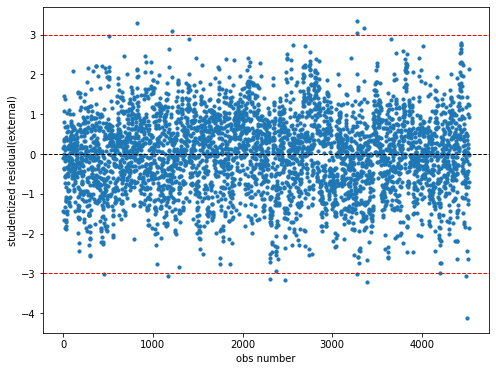

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(x = resid['idx'], y=resid['res'], s=10)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=3, color='red', linestyle='--', linewidth=1)
plt.axhline(y=-3, color='red', linestyle='--', linewidth=1)
plt.xlabel('obs number')
plt.ylabel('studentized residual(external)')
plt.show()

표준화 잔차의 절댓값이 3보다 큰 데이터들이 다소 보임.   

In [28]:
# 표준화 잔차의 절댓값이 3보다 큰 데이터
resid[['res']][(resid['res']>3) | (resid['res']<-3)] 

,res
455,-3.013835
823,3.298400
1174,-3.056280
1215,3.085700
2309,-3.138348
2476,-3.173943
3277,3.049503
3280,-3.015018
3282,3.332715
3358,3.164146


## 영향점 파악

### Laverage value를 이용한 산점도

In [29]:
laverage = influence.hat_diag_factor
laverage

array([0.00159668, 0.00109128, 0.00068781, ..., 0.00204193, 0.00102197,
       0.00137915])

In [30]:
mean_h = np.sum(laverage)/len(laverage)   # 평균 레버리지
mean_h

0.001549331288781076

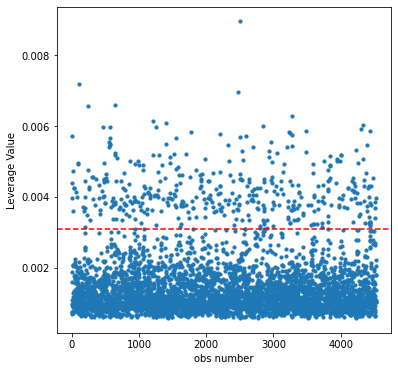

In [31]:
## 시각화
fig = plt.figure(figsize=(6,6))
idx = range(0, media.shape[0])
plt.scatter(idx, laverage, s=10)
plt.axhline(2*mean_h,linestyle='--',color='red')
plt.xlabel('obs number')
plt.ylabel('Leverage Value')
plt.show()

중간의 빨간색 점선은 (2 * laverage 평균)을 의미

### Cook's distance, DFITS를 이용한 영향점 분류

In [32]:
n = media2.shape[0]
p = x_data3.shape[1]
x = np.sqrt((p+1)/(n-p-1))  # dffits의 기준값
cdis = influence.cooks_distance[0]
dfits = influence.dffits[0]
influential = pd.DataFrame({"Cook's Distance" : cdis, "DFITS" : dfits})
influential.describe()

,Cook's Distance,DFITS
count,4.528000e+03,4528.000000
mean,2.402551e-04,0.000746
std,4.857136e-04,0.041018
min,1.137191e-11,-0.226865
25%,1.751755e-05,-0.024259
50%,8.362223e-05,0.001202
75%,2.604161e-04,0.024144
max,7.326684e-03,0.222115


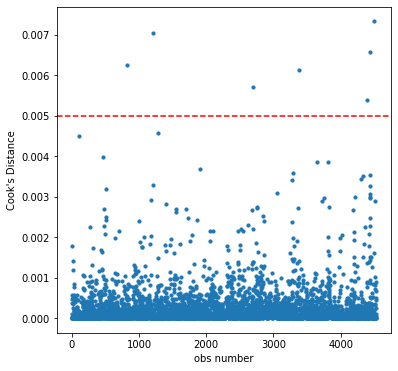

In [33]:
fig = plt.figure(figsize=(6,6))
idx = range(1,n+1)
plt.scatter(idx, influential["Cook's Distance"], s=10)
plt.axhline(0.005,linestyle='--',color='red')
plt.xlabel('obs number')
plt.ylabel("Cook's Distance")
plt.show()

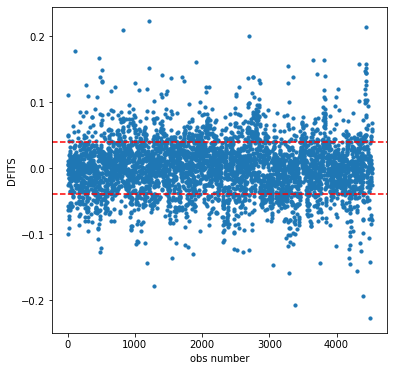

In [34]:
fig = plt.figure(figsize=(6,6))
idx = range(1,n+1)
plt.scatter(idx, influential["DFITS"], s=10)
plt.axhline(x,linestyle='--',color='red')
plt.axhline(-x,linestyle='--',color='red')
plt.xlabel('obs number')
plt.ylabel('DFITS')
plt.show()

In [35]:
# Cook's Distance가 0.004보다 크고, DFFITS의 절댓값이 기준값(np.sqrt((p+1)/(n-p-1)) : 교과서 참고)보다 작은 경우
influential[(cdis>0.004) & ((dfits>x) | (dfits<-x))] 

,Cook's Distance,DFITS
114,0.004504,0.177624
823,0.006240,0.209227
1215,0.007035,0.222115
1288,0.004576,-0.179109
2695,0.005698,0.199858
3386,0.006129,-0.207351
4398,0.005379,-0.194176
4433,0.006560,0.214457
4501,0.007327,-0.226865


## 이상치, 영향점 제외한 후 모델 적합

In [36]:
# 이상치 이거나 영향점인 점 제외
outlier = media2[((cdis>0.004) & ((dfits>x) | (dfits<-x))) | (resid['res'] > 3) | (resid['res'] < -3) ].index
x_data4 = x_data3.drop(outlier)
target4 = target.drop(outlier)

In [37]:
# 모델 적합
x_data4_1 = sm.add_constant(x_data4, has_constant="add")
model4 = sm.OLS(target4, x_data4_1)
fitted_model4 = model4.fit()
fitted_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     228.0
Date:                Thu, 20 May 2021   Prob (F-statistic):          6.17e-255
Time:                        18:59:02   Log-Likelihood:                -2628.8
No. Observations:                4510   AIC:                             5272.
Df Residuals:                    4503   BIC:                             5317.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4880      0.056     26.535      0.000       1.378       1.598
Gender_W             -0.0383      0.013     -2.927      0.003      -0.064      -0.013
School_M             -0.0854      0.028     -3.006      0.003      -0.141      -0.030
School_U              0.0399      0.015      2.650      0.008       0.010       0.069
Age/10 + Com Utlz     0.0290      0.004      6.965      0.000       0.021       0.037
Media Utlz            0.2298      0.010     23.597      0.000       0.211       0.249
Privacy               0.1429      0.008     18.653      0.000       0.128       0.158
==============================================================================
Omnibus:                       10.247   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.247
Skew:                          -0.066   Prob(JB):                      0.00982
Kurtosis:                       2.821   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

설명력 0.225 -> 0.233 으로 증가

## 잔차의 선형성, 등분산성 검증 - 잔차 산점도(새로운 모델을 이용하여)

In [38]:
influence2 = fitted_model4.get_influence()
standardized_residuals2 = influence2.resid_studentized_external
resid2 = pd.DataFrame({'res' : standardized_residuals2})
resid2['idx'] = pd.DataFrame({i for i in range(0, len(standardized_residuals2))})

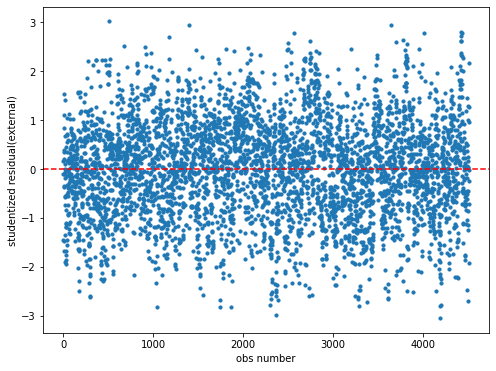

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(x = resid2['idx'], y=resid2['res'], s=10)
plt.axhline(0,linestyle='--',color='red')
plt.xlabel('obs number')
plt.ylabel('studentized residual(external)')
plt.show()

## 잔차의 정규성 검증 - Normal qq plot

C:\Users\KimYoungHo\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


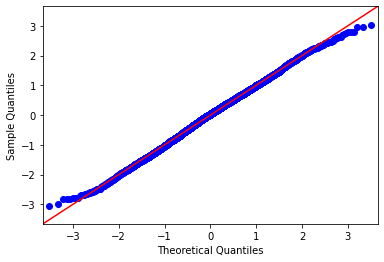

In [40]:
fig = sm.qqplot(resid2['res'], fit=True, line='45')

## 가법 모형의 적절성 검증

In [41]:
x_data5 = x_data4.reset_index(drop=True)
category1 = x_data5[(x_data5['Gender_W'] == 0) & (x_data5['School_M'] == 0) & (x_data5['School_U'] == 0)].index
category2 = x_data5[(x_data5['Gender_W'] == 0) & (x_data5['School_M'] == 0) & (x_data5['School_U'] == 1)].index
category3 = x_data5[(x_data5['Gender_W'] == 0) & (x_data5['School_M'] == 1) & (x_data5['School_U'] == 0)].index
category4 = x_data5[(x_data5['Gender_W'] == 1) & (x_data5['School_M'] == 0) & (x_data5['School_U'] == 0)].index
category5 = x_data5[(x_data5['Gender_W'] == 1) & (x_data5['School_M'] == 0) & (x_data5['School_U'] == 1)].index
category6 = x_data5[(x_data5['Gender_W'] == 1) & (x_data5['School_M'] == 1) & (x_data5['School_U'] == 0)].index

In [42]:
x_data5['category'] = 0
x_data5.iloc[category1, 6] = 'Man + High'
x_data5.iloc[category2, 6] = 'Man + Uni'
x_data5.iloc[category3, 6] = 'Man + Mid'
x_data5.iloc[category4, 6] = 'Wo + High'
x_data5.iloc[category5, 6] = 'Wo + Uni'
x_data5.iloc[category6, 6] = 'Wo + Mid'

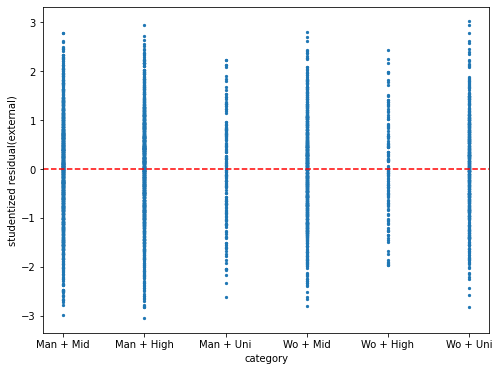

In [43]:
resid3 = resid2.copy()
resid3['category'] = x_data5['category']
plt.figure(figsize=(8, 6))
cate_values = ['Man + Mid', 'Man + High', 'Man + Uni', 'Wo + Mid', 'Wo + High', 'Wo + Uni']
plt.xticks(ticks=range(len(cate_values)), labels=cate_values)
plt.scatter(x = resid3['category'], y=resid3['res'], s=5)
plt.axhline(0,linestyle='--',color='red')
plt.xlabel('category')
plt.ylabel('studentized residual(external)')
plt.show()

<AxesSubplot:xlabel='category', ylabel='res'>

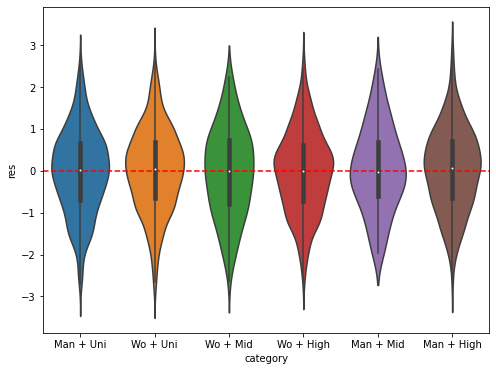

In [44]:
plt.figure(figsize=(8, 6))
cate_values = ['Man + Mid', 'Man + High', 'Man + Uni', 'Wo + Mid', 'Wo + High', 'Wo + Uni']
plt.axhline(0,linestyle='--',color='red')
sns.violinplot(data=resid3, y="res", x="category")

각각의 카테고리에서 잔차가 0을 중심으로 적절히 분포되어 있음  
-> 가법 모형(Additive Model)만으로도 적절함

# 추가 모델 적합

## Age/10 -> Literacy 단일 변수로 적합

In [45]:
x_data5 = x_data1.drop(outlier)
target5 = target.drop(outlier)
x_Age = x_data5['Age']/10
x_Age_1 = sm.add_constant(x_Age, has_constant="add")
model5 = sm.OLS(target5, x_Age_1)
fitted_model5 = model5.fit()
fitted_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.31
Date:                Thu, 20 May 2021   Prob (F-statistic):           1.14e-05
Time:                        18:59:12   Log-Likelihood:                -3217.3
No. Observations:                4510   AIC:                             6439.
Df Residuals:                    4508   BIC:                             6451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2041      0.020    158.511      0.000       3.165       3.244
Age           -0.0218      0.005     -4.395      0.000      -0.031      -0.012
==============================================================================
Omnibus:                       19.252   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.842
Skew:                          -0.072   Prob(JB):                     0.000363
Kurtosis:                       2.748   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Age', ylabel='Literacy'>

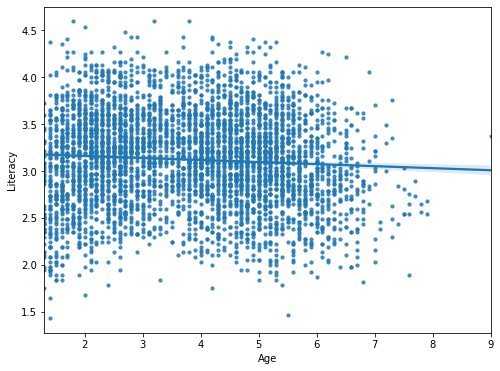

In [46]:
plt.figure(figsize=(8, 6))
sns.regplot(x=x_Age, y=target5, scatter_kws={'s':10})

## Community Utlz -> Literacy 단일 변수로 적합

In [47]:
x_Com = x_data5['Community Utlz']
x_Com_1 = sm.add_constant(x_Com, has_constant="add")
model6 = sm.OLS(target5, x_Com_1)
fitted_model6 = model6.fit()
fitted_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     124.7
Date:                Thu, 20 May 2021   Prob (F-statistic):           1.38e-28
Time:                        18:59:13   Log-Likelihood:                -3165.4
No. Observations:                4510   AIC:                             6335.
Df Residuals:                    4508   BIC:                             6348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9768      0.015    200.438      0.000       2.948       3.006
Community Utlz     0.0997      0.009     11.168      0.000       0.082       0.117
==============================================================================
Omnibus:                       19.847   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.899
Skew:                          -0.013   Prob(JB):                     0.000582
Kurtosis:                       2.720   Cond. No.                         4.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Community Utlz', ylabel='Literacy'>

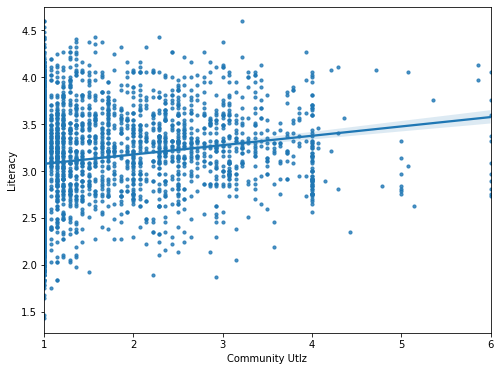

In [48]:
plt.figure(figsize=(8, 6))
sns.regplot(x=x_Com, y=target5, scatter_kws={'s':10})